# Linear Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.ndimage import rotate
import sympy
from functools import partial
from IPython.display import display, Math
from itertools import product

plt.style.use("seaborn-v0_8-whitegrid")

## Singularity (week 1)

| Complete | Redundant | Contradictory |
|---|---|---|
| $\begin{cases} a + b = 10  \\ a + 2b = 12 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 20 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 24 \end{cases}$ |

The first system is complete (non-singular) because it has one solution. $a=8$ and $b=2$.

The second system is redundant (singular) because it has many solutions. Any $a$ and $b$ whose sum is 10.

The second systemt is contradictory (singular) because it has no solutions. No $a+b$ can be equal to 10 while $2(a+b)$ not being 20.

> 🔑 **Singular:** peculiar, irregular

> 🔑 **Non-singular:** regular

### Singularity and linear dependency

A system of equations can also be represented as lines.

In a non-singular system the lines will intersect at the solution.

In a singular (redundant) system the lines will be one over the other (ie parallalel with distant zero).

In a singular (contradictory) system the lines will be parallel and distant from each other.

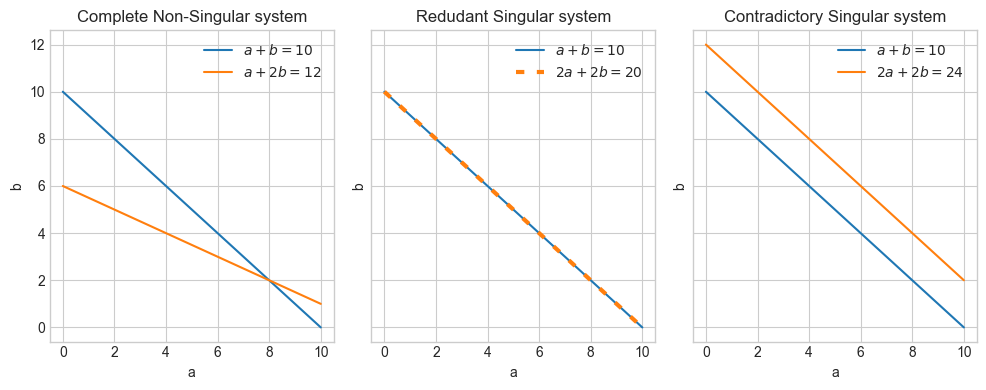

In [2]:
def line1(a):
    return 10.0 - a


def line2(a):
    return 6.0 - (0.5) * a


def line3(a):
    return (20.0 - 2.0 * a) / 2


def line4(a):
    return 12.0 - a


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

ax1.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax1.plot([0.0, 10.0], [line2(0.0), line2(10.0)], label="$a+2b=12$")
ax1.set_ylabel("b")
ax1.set_xlabel("a")
ax1.legend()
ax1.set_title("Complete Non-Singular system")

ax2.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax2.plot(
    [0.0, 10.0],
    [line3(0.0), line3(10.0)],
    dashes=[2, 3],
    linewidth="3",
    label="$2a+2b=20$",
)
ax2.set_ylabel("b")
ax2.set_xlabel("a")
ax2.legend()
ax2.set_title("Redudant Singular system")

ax3.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax3.plot([0.0, 10.0], [line4(0.0), line4(10.0)], label="$2a+2b=24$")
ax3.set_ylabel("b")
ax3.set_xlabel("a")
ax3.legend()
ax3.set_title("Contradictory Singular system")

plt.tight_layout()
plt.show()

It turns out that to distinguish between singular and non-singular, the constants can be removed.

| Complete | Redundant | Contradictory |
|---|---|---|
| $\begin{cases} a + b = 10  \\ a + 2b = 12 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 20 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 24 \end{cases}$ |

Becomes

| Non-Singular | Singular |
|---|---|
| $\begin{cases} a + b = 0 \\ a + 2b = 0 \end{cases}$ | $\begin{cases} a + b = 0 \\ 2a + 2b = 0 \end{cases}$ |

And this is where the notion of **Non-singular** and **Singular** matrices comes in.

| Non-Singular | Singular |
|---|---|
| $\begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$ $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ | $\begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix}$ $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ |

&nbsp;
> :key: **Singular**: the rows are linearly dependent

> :key: **Non-singular**: the rows are linearly independent

When the rows are linearly indpendendent, there is no constant you can multiply a row by to obtain the second row. 

A different interpretation is that each row carries new information that we cannot derive from any other rows.

In contrast, the information provided by the rows of a singular matrix are either redundant or contradictory.

### Singularity and the determinant

> :key: **Singular**: determinant is zero

> :key: **Non-singular**: determinant is non-zero

To see how we get to the formula for the determinant and why it's 0 for singular matrices.

$A := \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$

We saw earlier that $A$ is singular if $(a+b)k = c+d$ for $k > 0$ (linear dependency).

In particular we saw $\begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix}$ is singular because $(1+1)k = 2+2$ for $k=2$.

Equivalently

$A := 
\begin{cases}
ax + by = 0 \\
cx + dy = 0
\end{cases} \rightarrow
\begin{cases}
k_1ax = cx \\
k_2by = dy
\end{cases} \rightarrow
\begin{cases}
k_1 = \cfrac{c}{a} \\
k_2 = \cfrac{d}{b}
\end{cases} if k_1 = k_2 = k > 0 \rightarrow
\cfrac{c}{a} = \cfrac{d}{b} \rightarrow 
bc = ad
$

and finally

$\det A = ad - bc$

$A$ is singular if $ad - bc$ is 0, which implies that $k > 0$

The determinant has the following properties.

> :key: $\det A \times \det B = \det AB$

> :key: $\det A^{-1} = \cfrac{1}{\det A}$

The second one actually can be derived from the first property.

$\det AA^{-1} = \det A \times \det A^{-1}$

$\det I = \det A \times \det A^{-1}$

$\cfrac{\det I}{\det A} = \det A^{-1}$

$\cfrac{1}{\det A} = \det A^{-1}$

Let's verify the first property, the second property and also that $\det I = 1$

In [3]:
A = np.array([[5, 3], [2, 1]])
B = np.array([[1, -1], [3, 4]])

assert np.isclose(np.linalg.det(A) * np.linalg.det(B), np.linalg.det(np.matmul(A, B)))
assert np.isclose(np.linalg.det(np.linalg.inv(A)), 1 / np.linalg.det(A))
assert np.isclose(np.linalg.det(np.linalg.inv(B)), 1 / np.linalg.det(B))
assert np.linalg.det(np.identity(2)) == 1.0

### Singularity and rank

We can think the rank of a matrix in terms of how non-singular a matrix is.

A 2-D matrix has solution in a 2-D space.

When a matrix is non-singular, we get a point as the solution; and since a point has 0 dimensions, the rank is 2. 

When a matrix is singular, we get a line as the solution or the whole space. A line has dimension 1 and the whole space has dimension 2, so the rank is 1 and 0, respectively.

Similarly to what we saw for the determinant of matrix, the rank relates to the amount of linearly independent rows of a matrix.

> :key: The rank of a matrix is the number of linearly independent rows

Although this can help develop an intuition of what the rank of a matrix represents, it doesn't help determine it, especially for large matrices or non-obvious linear dependencies.

One method to determine the rank of a matrix is through the reduced row-echelon form (rref) of a matrix.

Let's consider the matrix

$\begin{bmatrix}5&&1\\4&&-3\end{bmatrix}$

We can obtain the row echelon form via row operations:
- switching any two rows
- multiplying (dividing) a row by a nonzero constant
- adding (subtracting) one row to another

Row operations are such that they don't alter the singularity or non-singularity of a matrix, nor its rank.

1. Divide each row by the leftmost non-zero coefficient

$\begin{bmatrix}1&&\cfrac{1}{5}\\1&&-\cfrac{3}{4}\end{bmatrix}$

2. Subtract the first row from the second row

$\begin{bmatrix}1&&\cfrac{1}{5}\\0&&-\cfrac{3}{4}-\cfrac{1}{5}\end{bmatrix}$

3. Divide the last row by the leftmost non-zero coefficient

$\begin{bmatrix}1&&\cfrac{1}{5}\\0&&1\end{bmatrix}$

4. Multiply the second row by $\cfrac{1}{5}$ and subtract it from the first row

$\begin{bmatrix}1&&0\\0&&1\end{bmatrix}$

Or we can use the `rref` method of the `Matrix` data structure from the `sympy` package.

In [4]:
sympy.Matrix([[5, 1], [1, -3]]).rref(pivots=False)

Matrix([
[1, 0],
[0, 1]])

Let's try to calculate the rref of a singular matrix: a 3x3 matrix where **all** rows are linearly dependent.

In [5]:
sympy.Matrix([[1, 2, 3], [3, 6, 9], [2, 4, 6]]).rref(pivots=False)

Matrix([
[1, 2, 3],
[0, 0, 0],
[0, 0, 0]])

Let's try another singular matrix, where only 2 rows are linearly dependent.

In [6]:
sympy.Matrix([[1, 2, 3], [3, 6, 9], [1, 2, 4]]).rref(pivots=False)

Matrix([
[1, 2, 0],
[0, 0, 1],
[0, 0, 0]])

The rref form is characterized by the presence of pivots.

> :key: A pivot is the first non-zero entry of each row in a row-echelon form.

And it turns out the pivots help us determine the rank of a matrix.

> :key: The rank of a matrix is the number of pivots of its row-echelon form

## Solving a system of equations (week 2)

We can solve this system by elimination or substitution.

$\begin{cases}
5a + b = 17 \\
4a - 3b = 6
\end{cases}$

### Elimination method

1. $\begin{cases}
a + 0.2b = 3.4 \\
a - 0.75b = 1.5
\end{cases}$

2. $\begin{cases}
a + 0.2b = 3.4 \\
a - 0.75b = 1.5
\end{cases}$

Eliminate $a$

3. $\begin{cases}
a + 0.2b = 3.4 \\
0 - 0.95b = -1.9
\end{cases}$

4. $\begin{cases}
a + 0.2b = 3.4 \\
b = 2.
\end{cases}$

5. $\begin{cases}
a = 3. \\
b = 2.
\end{cases}$

### Substitution method

1. $\begin{cases}
a + 0.2b = 3.4 \\
a - 0.75b = 1.5
\end{cases}$

2. $\begin{cases}
a = 3.4 - 0.2b \\
a = 1.5 + 0.75b
\end{cases}$

Substitute $a$

3. $\begin{cases}
a = 3.4 - 0.2b \\
3.4 - 0.2b - 1.5 - 0.75b = 0
\end{cases}$

4. $\begin{cases}
a = 3.4 - 0.2b \\
1.9 - 0.95b = 0
\end{cases}$

5. $\begin{cases}
a = 3.4 - 0.2b \\
b = 2.
\end{cases}$

5. $\begin{cases}
a = 3. \\
b = 2.
\end{cases}$

Let's check the solution.

In [7]:
a = 3.0
b = 2.0

assert 5.0 * a + b == 17.0
assert 4.0 * a - 3.0 * b == 6.0
assert np.allclose(
    np.linalg.solve(np.array([[5.0, 1.0], [4.0, -3.0]]), np.array([17.0, 6.0])),
    np.array([a, b]),
)

Let's build an elimination algorithm using this system as an example.

$\begin{cases}
a + b + 2c = 12 \\
3a - 3b - c = 2 \\
2a - b + 6c = 24
\end{cases}$

In [8]:
a = np.array([[1, 1, 2], [3, -3, -1], [2, -1, 6]], dtype="float32")
b = np.array([12, 2, 24], dtype="float32")


def solve_by_elimination(a: np.array, b: np.array) -> np.array:
    c = np.hstack((a, b.reshape(-1, 1)))
    for i in range(c.shape[0] - 1):
        # normalize row i
        c[i:, :] /= c[i:, i].reshape(-1, 1)
        # remove row i from row i+1, i+2, etc...
        c = np.vstack((c[: i + 1, :], c[i + 1 :,] - c[i, :]))
    for i in range(c.shape[0] - 1, -1, -1):
        # bring solved (if any) to RHS
        c[i, -1] -= np.sum(c[i, (i + 1) : -1])
        c[i, (i + 1) : -1] = 0
        # divide whole row by coefficient of variable
        c[i, :] /= c[i, i]
        # replace solution across the system
        c[:i, i] *= c[i, -1]
    return c[:, -1]


solve_by_elimination(a, b)

array([3.757576 , 2.0606058, 3.0909092], dtype=float32)

Let's check the solution.

In [9]:
assert np.allclose(solve_by_elimination(a, b), np.linalg.solve(a, b))

Let's try it with another one.

In [10]:
a = np.array(
    [[2, -1, 1, 1], [1, 2, -1, -1], [-1, 2, 2, 2], [1, -1, 2, 1]], dtype="float32"
)
b = np.array([6, 3, 14, 8], dtype="float32")
assert np.allclose(solve_by_elimination(a, b), np.linalg.solve(a, b))

## Vectors (week 3)

Let's consider these two vectors:

$\vec{a}=\begin{bmatrix}1\\3\end{bmatrix}$ and $\vec{b}=\begin{bmatrix}4\\1\end{bmatrix}$

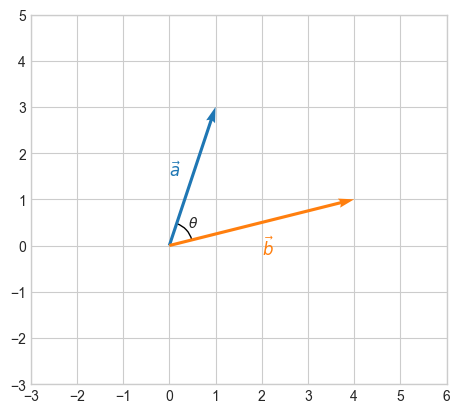

In [11]:
a = np.array([1, 3])
b = np.array([4, 1])

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.show()

### The angle between vectors

To calculate $\theta$ we can use the **Law of Cosines**

> :triangular_ruler: $\|\vec{c}\|^2 = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

which relates the lengths of the sides of a triangle to the cosine of one of its angles.

We don't have $\vec{c}$ though, but we can demonstrate that $\vec{c} = \vec{b} - \vec{a}$

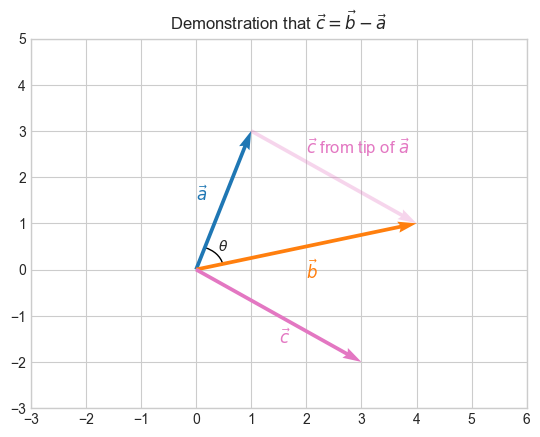

In [12]:
a = np.array([1, 3])
b = np.array([4, 1])
c = b - a

plt.grid(zorder=1)
plt.quiver(
    [0, 0, 0, a[0]],
    [0, 0, 0, a[1]],
    [a[0], b[0], c[0], c[0]],
    [a[1], b[1], c[1], c[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange", "tab:pink", "tab:pink"],
    alpha=[1.0, 1.0, 1.0, 0.3],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\vec{c}$", [c[0] / 2, c[1] / 2 - 0.6], color="tab:pink", fontsize=12)
plt.annotate(
    "$\\vec{c}$ from tip of $\\vec{a}$",
    [b[0] / 2, a[1] - 0.5],
    color="tab:pink",
    fontsize=12,
)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Demonstration that $\\vec{c} = \\vec{b} - \\vec{a}$")
plt.show()

> :key: Vectors are unique in that they maintain their direction and magnitude regardless of where they "start" or "end" in space. Vectors are typically drawn starting from the origin to clearly depict their direction and magnitude. However, the true essence of a vector is that it represents a direction and magnitude in space and can be shifted anywhere. When we compute $\vec{c} = \vec{b} - \vec{a}$ we're calculating the vector that starts from the tip of $\vec{a}$ nd goes to the tip of $\vec{b}$. We can draw it starting from the origin or starting from the tip of $\vec{a}$.

Now, that we've established $\vec{c} = \vec{b} - \vec{a}$, let's isolate $\cos\theta$ from the cosine formula 

$\|\vec{c}\|^2 = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$.

$\|\vec{c}\|^2 = \vec{c} \cdot \vec{c}$

$\|\vec{c}\|^2 = (\vec{b} - \vec{a}) \cdot (\vec{b} - \vec{a})$

$\|\vec{c}\|^2 = \vec{b} \cdot \vec{b} + \vec{a} \cdot \vec{a} - 2\vec{a} \cdot \vec{b}$

$\|\vec{c}\|^2 = \|\vec{b}\|^2 + \|\vec{a}\|^2 - 2\vec{a} \cdot \vec{b}$

Let's verify what we've derived so far

In [13]:
assert np.isclose(np.linalg.norm(c) ** 2, np.dot(c, c))
assert np.isclose(np.linalg.norm(c) ** 2, np.dot(b - a, b - a))
assert np.isclose(
    np.linalg.norm(c) ** 2, np.dot(b, b) + np.dot(a, a) - 2 * np.dot(a, b)
)
assert np.isclose(
    np.linalg.norm(c) ** 2,
    np.linalg.norm(b) ** 2 + np.linalg.norm(a) ** 2 - 2 * np.dot(a, b),
)

Let's substitute it into the cosine formula

$\|\vec{b}\|^2 + \|\vec{a}\|^2 - 2\vec{a} \cdot \vec{b} = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

$- 2\vec{a} \cdot \vec{b} = - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

$\cfrac{- 2\vec{a} \cdot \vec{b}}{- 2\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

> :triangular_ruler: $\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

The numerator is the dot product of $\vec{a}$ and $\vec{b}$. The denominator is a normalization scalar.

We can actually rewrite it as

$\cfrac{\vec{a}}{\|\vec{a}\|} \cdot \cfrac{\vec{b}}{\|\vec{b}\|} = \cos\theta$

where $\cfrac{\vec{a}}{\|\vec{a}\|}$ and $\cfrac{\vec{b}}{\|\vec{b}\|}$ are the unit vectors of $\vec{a}$ and $\vec{b}$.

And we can verify that the two are indeed the same.

In [14]:
assert np.isclose(
    np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)),
    np.dot(a / np.linalg.norm(a), b / np.linalg.norm(b)),
)

Once we have $\cos\theta$ we can calculate $\theta$ with the inverse cosine function.

In [15]:
cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print(f"cos(theta): {cos_theta:.2f}")
print(f"theta (radians): {np.arccos(cos_theta):.2f}")
print(
    f"theta (degrees): {np.degrees(np.arccos(cos_theta)):.2f}\N{DEGREE SIGN}"
)  # or multiply radians by 180/math.pi

cos(theta): 0.54
theta (radians): 1.00
theta (degrees): 57.53°


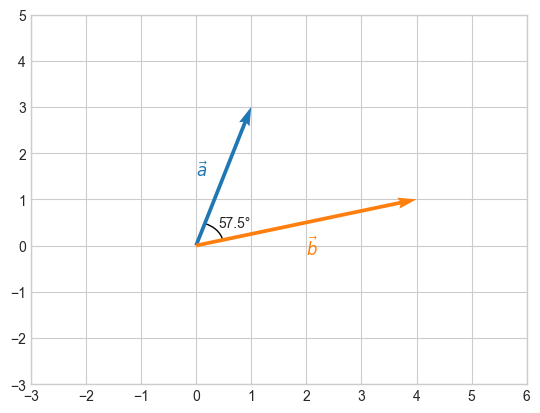

In [16]:
a = np.array([1, 3])
b = np.array([4, 1])

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.4, 0.4], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.show()

### Vector projections

Now, let's say we want to project $\vec{b}$ onto $\vec{a}$.

> :key: The vector projection of $\vec{b}$ onto $\vec{a}$ (denoted as $\|\overrightarrow{proj_{a}b}\|$) is a vector with the same direction as $\vec{a}$ and a magnitude such that the tip of $\vec{b}$ lies perpedincularly onto $\vec{a}$. 

It's like $\vec{b}$ casting its shadow onto $\vec{a}$.

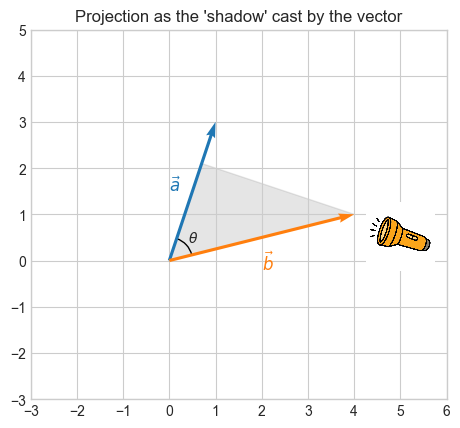

In [17]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
d = b - proj_b

img = plt.imread("assets/flashlight.jpg")
angle = math.degrees(math.atan2(a[1], a[0])) - 90
imgbox = mpl.offsetbox.OffsetImage(
    rotate(img, angle, reshape=False, cval=255), zoom=0.05
)
imgabb = mpl.offsetbox.AnnotationBbox(imgbox, (5, 0.5), xycoords="data", frameon=False)
angle = math.degrees(math.atan2(a[1], a[0]))

shadow = plt.Polygon(
    [proj_b, b, [0, 0]],
    closed=True,
    fill=True,
    edgecolor="gray",
    facecolor="gray",
    alpha=0.2,
    zorder=0,
)

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.gca().add_artist(imgabb)
plt.gca().add_patch(shadow)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection as the 'shadow' cast by the vector")
plt.gca().set_aspect("equal")
plt.show()



The definition of $\cos \theta$ in a right triangle is $adjacent / hypotenuse$.

<img src="https://ichef.bbci.co.uk/images/ic/1280xn/p0dktj82.png" width="30%">

The $hypotenuse$ is the length of vector we want to project ($\|\vec{b}\|$).

The $adjacent$ is the length of such projection ($\|\overrightarrow{proj_{a}b}\|$).

So, by definition:

$\cos\theta = \cfrac{\|\overrightarrow{proj_{a}b}\|}{\|\vec{b}\|}$

and, the **length** of the projection of $\vec{b}$ is:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cos\theta$

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYHv2gl3xCjoh66VBZOxWU7R3ycaKBEQJLcHeyU-pc9kCcZq_q8WfNjEqE9FK83dtVnpo&usqp=CAU)

In the image above, we can see an interesting fact.

If the length of the vector we want to project is 1, then the length of the projection is $\cos\theta$.

$\|\overrightarrow{proj_{a}b}\| = \cos\theta$ when $\|\vec{b}\| = 1$

It turns out we don't need $\cos\theta$ to calculate the length of the projection.

We can substitute the definition of $\cos\theta$ into the definition of the length of the projection.

Definition of $\cos\theta$:

$\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

Definition of length of the projection:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cos\theta$

So it becomes:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|}$

which simplifies to

$\|\overrightarrow{proj_{a}b}\| = \cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|}$

What about the direction?

By definition the projection of $\vec{b}$ onto $\vec{a}$ must have the same direction as $\vec{a}$.

> :key: A unit vector has direction $\langle a_1, a_2, ..., a_n \rangle \in\mathbb{R}^n$ and length of 1 ($\|\vec{a}\|=1$).

Let $\|\overrightarrow{proj_{a}b}\|$ be the length of the projection and $\cfrac{\vec{a}}{\|\vec{a}\|}$ be the unit vector of $\vec{a}$, we get that

$\overrightarrow{proj_{a}b} = \|\overrightarrow{proj_{a}b}\| \cfrac{\vec{a}}{\|\vec{a}\|}$

Finally we can substitute the definition of $\|\overrightarrow{proj_{a}b}\|$ and we obtain the formula of the **projection of $\vec{b}$ onto $\vec{a}$**:

> :triangular_ruler:  $\overrightarrow{proj_{a}b} = \cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|} \cfrac{\vec{a}}{\|\vec{a}\|}$

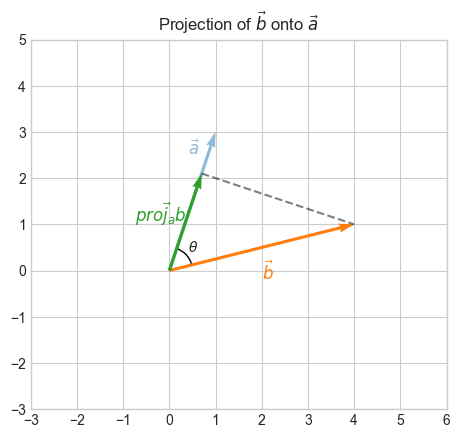

In [18]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))

plt.grid(zorder=1)
plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange", "tab:green"],
    alpha=[0.5, 1.0, 1.0],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
    alpha=0.5,
)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.gca().set_aspect("equal")
plt.show()

We can see that $\overrightarrow{proj_{a}b}$ (adjacent) and $\vec{b}$ (hypotenuse) form a right triangle.

In [19]:
a = np.linalg.norm(proj_b)
h = np.linalg.norm(b)
o = np.linalg.norm(proj_b - b)

cos_theta = a / h
sin_theta = o / h

From the Pythagorean theorem we have

$h^2 = o^2 + a^2$

Equivalently:

$1 = (\cfrac{o}{h})^2 + (\cfrac{a}{h})^2$

$1 = \cos\theta^2 + \sin\theta^2$

Let's verify it.

In [20]:
assert h**2 == o**2 + a**2
assert 1 == (o / h) ** 2 + (a / h) ** 2
assert 1 == cos_theta**2 + sin_theta**2

We can also verify that the angles of the triangle sum up to 180.

We already have one angle, and one is 90 by definition. We only need the one between $\vec{b}$ and its adjacent $\vec{proj_b} - \vec{b}$.

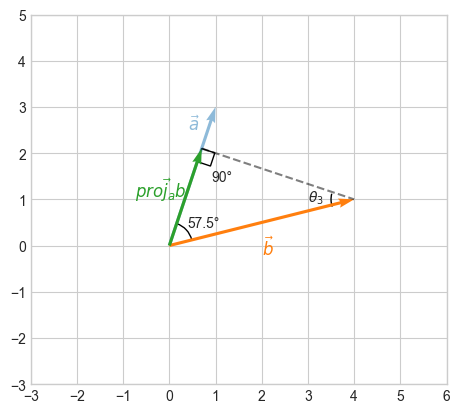

In [21]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
c = proj_b - b

plt.grid(zorder=1)
plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange", "tab:green"],
    alpha=[0.5, 1.0, 1.0],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)

a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc_1 = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc_1)
b_deg = math.degrees(math.atan2(b[1], b[0]))
c_deg = math.degrees(math.atan2(c[1], c[0]))
arc_2 = mpl.patches.Arc((b[0], b[1]), 1, 1, angle=0, theta1=-180 - b_deg, theta2=-c_deg)
plt.gca().add_patch(arc_2)
arc_3 = plt.Rectangle(
    proj_b,
    -0.3,
    -0.3,
    angle=a_deg,
    fill=False,
    edgecolor="k",
    zorder=1,
)
plt.gca().add_patch(arc_3)
plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
    alpha=0.5,
)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.4, 0.4], fontsize=10
)
plt.annotate("$\\theta_3$", [3.0, 0.95], fontsize=10)
plt.annotate("90\N{DEGREE SIGN}", [0.9, 1.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.show()

Let's find $\cos\theta_3$ and verify that the sum of the 3 angles is 180.

In [22]:
theta_1_deg = np.degrees(np.arccos(cos_theta))

a = np.linalg.norm(proj_b - b)
h = np.linalg.norm(b)
o = np.linalg.norm(proj_b)

cos_theta_2 = a / h
theta_2_deg = np.degrees(np.arccos(cos_theta_2))

theta_3_deg = 90

assert theta_1_deg + theta_2_deg + theta_3_deg == 180

Let's consider a different pair of vectors

$\vec{a}=\begin{bmatrix}-2\\3\end{bmatrix}$ and $\vec{b}=\begin{bmatrix}4\\1\end{bmatrix}$

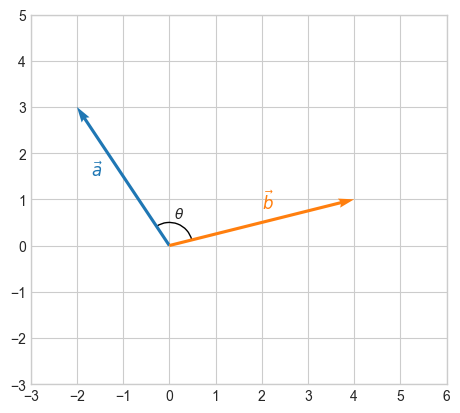

In [23]:
a = np.array([-2, 3])
b = np.array([4, 1])

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.1, 0.6], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.show()

We can use the 'shadow' metaphor to get an intuition of what the projection of $\vec{b}$ onto $\vec{a}$ might look like.

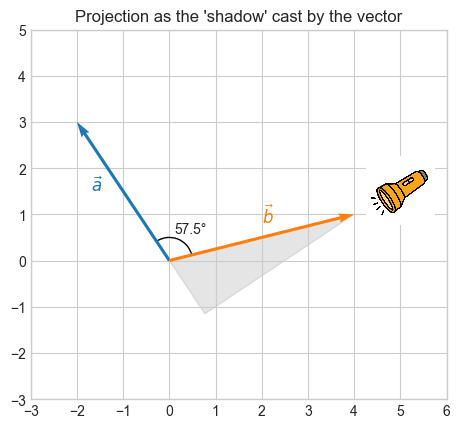

In [24]:
a = np.array([-2, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
d = b - proj_b

img = plt.imread("assets/flashlight.jpg")
angle = math.degrees(math.atan2(a[1], a[0])) - 90
imgbox = mpl.offsetbox.OffsetImage(
    rotate(img, angle, reshape=False, cval=255), zoom=0.05
)
imgabb = mpl.offsetbox.AnnotationBbox(imgbox, (5, 1.5), xycoords="data", frameon=False)
angle = math.degrees(math.atan2(a[1], a[0]))

shadow = plt.Polygon(
    [proj_b, b, [0, 0]],
    closed=True,
    fill=True,
    edgecolor="gray",
    facecolor="gray",
    alpha=0.2,
    zorder=0,
)

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.gca().add_artist(imgabb)
plt.gca().add_patch(shadow)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection as the 'shadow' cast by the vector")
plt.gca().set_aspect("equal")
plt.show()

In [25]:
a = np.array([-2, 3])
b = np.array([4, 1])

np.dot(a, b) / np.linalg.norm(a), np.linalg.norm(b) * np.dot(a, b) / (
    np.linalg.norm(a) * np.linalg.norm(b)
)

(-1.386750490563073, -1.386750490563073)

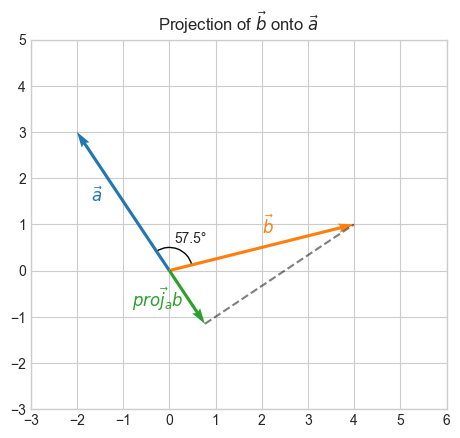

In [26]:
a = np.array([-2, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))

plt.grid(zorder=1)
plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange", "tab:green"],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.2, proj_b[1] / 2 - 0.2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.gca().set_aspect("equal")
plt.show()

### Geometric intuition of Dot product

Let's revisit the definition of $\cos\theta$ which we obtained from the **Law of Cosines**.

> :triangular_ruler: $\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

If we move $\|\vec{a}\|\|\vec{b}\|$ back to the RHS we get

$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|\cos\theta$

And when $\cos\theta > 0$ we can substitute $\|\vec{b}\|\cos\theta$ with $\|\overrightarrow{proj_{a}b}\|$ (whose equivalence was obtained from the general definition $\cos \theta = adjacent / hypotenuse$)

$\vec{a} \cdot \vec{b} = \|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$

> :key: When $\vec{a}$ and $\vec{b}$ "agree" on the direction ($0° < \theta < 90°$, that is $\cos\theta > 1$) the dot product between $\vec{a}$ and $\vec{b}$ is the length of $\vec{a}$ times the length of projection $\vec{b}$ onto $\vec{a}$.

Let's verify it.

In [27]:
a = np.array([1, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

assert cos_theta > 0
assert np.isclose(np.dot(a, b), np.linalg.norm(a) * np.linalg.norm(proj_b))

Let's imagine $\vec{b}$ was **parallel** to $\vec{a}$, that is, $\cos\theta = 1$ (0° angle).

Then $\vec{b} = \overrightarrow{proj_{a}b}$. In other words, $\vec{b}$ is already projected onto $\vec{a}$.

In this case

$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|$

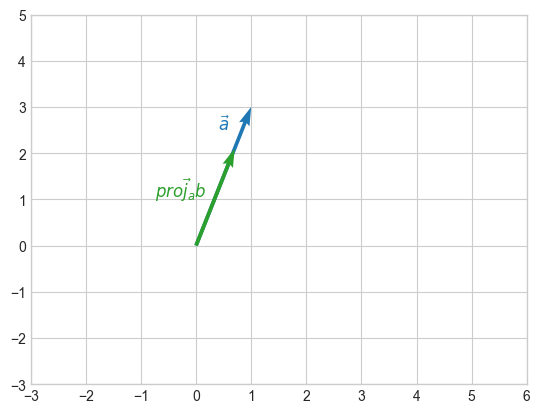

In [28]:
a = np.array([1, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

plt.grid(zorder=1)
plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], proj_b[0]],
    [a[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:green"],
)
plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("")
plt.show()

Let's see the case when this equivalence doesn't hold.

$\vec{a} \cdot \vec{b} = \|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$

But this does.

$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|\cos\theta$

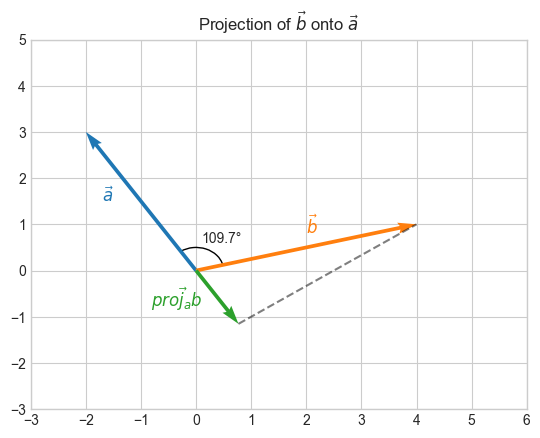

In [29]:
a = np.array([-2, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

plt.grid(zorder=1)
plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    zorder=2,
    color=["tab:blue", "tab:orange", "tab:green"],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.2, proj_b[1] / 2 - 0.2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.show()

Since the angle is more than 90°, $\cos\theta < 0$.

So $\vec{a} \cdot \vec{b}$ will be negative.

But $\|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$ is always positive.

In [30]:
print(f"Dot product: {np.dot(a, proj_b):.2f}")
print(
    f"Norm of a times norm of projection: {np.linalg.norm(a) * np.linalg.norm(proj_b):.2f}"
)
print(
    f"Norm of a times norm of b times cos theta: {np.linalg.norm(a) * np.linalg.norm(b) * cos_theta:.2f}"
)

Dot product: -5.00
Norm of a times norm of projection: 5.00
Norm of a times norm of b times cos theta: -5.00


## Linear transformations (week 3)

Let's define some transformation matrices.

Horizontal scaling by 2:

$A_1=\begin{bmatrix}2&&0\\0&&1\end{bmatrix}$

Horizontal reflection:

$A_2=\begin{bmatrix}-1&&0\\0&&1\end{bmatrix}$

Rotation by 90 degrees clockwise:

$A_3=\begin{bmatrix}0&&1\\-1&&0\end{bmatrix}$

Horizontal shear by 0.5:

$A_4=\begin{bmatrix}1&&0.5\\0&&1\end{bmatrix}$

In [31]:
hscaling = np.array([[2, 0], [0, 1]])
reflection_yaxis = np.array([[-1, 0], [0, 1]])
rotation_90_clockwise = np.array([[0, 1], [-1, 0]])
shear_x = np.array([[1, 0.5], [0, 1]])

Let's apply these transformations to the basis vectors

$\vec{e_1}=\begin{bmatrix}1\\0\end{bmatrix}$ and $\vec{e_2}=\begin{bmatrix}0\\1\end{bmatrix}$

In [32]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])

A transformation is applied by multiplying $A_k$ by $e_i$.

For $e_1$ we have:

$
\begin{bmatrix}2&&0\\0&&1\end{bmatrix}
\begin{bmatrix}1\\0\end{bmatrix} = 
\begin{bmatrix}2 \times 1 + 0 \times 0\\0 \times 1 + 1 \times 0\end{bmatrix} =
\begin{bmatrix}2\\0\end{bmatrix}
$

For $e_2$ we have:

$
\begin{bmatrix}2&&0\\0&&1\end{bmatrix}
\begin{bmatrix}0\\1\end{bmatrix} = 
\begin{bmatrix}2 \times 0 + 0 \times 1\\0 \times 0 + 1 \times 1\end{bmatrix} =
\begin{bmatrix}0\\1\end{bmatrix}
$

Let's verify it.

In [33]:
display(
    Math(
        "T(\\vec{e_1})="
        + sympy.latex(sympy.Matrix(list(hscaling @ e1)))
        + "T(\\vec{e_2})="
        + sympy.latex(sympy.Matrix(list(hscaling @ e2)))
    )
)

<IPython.core.display.Math object>

Let's visualize it.

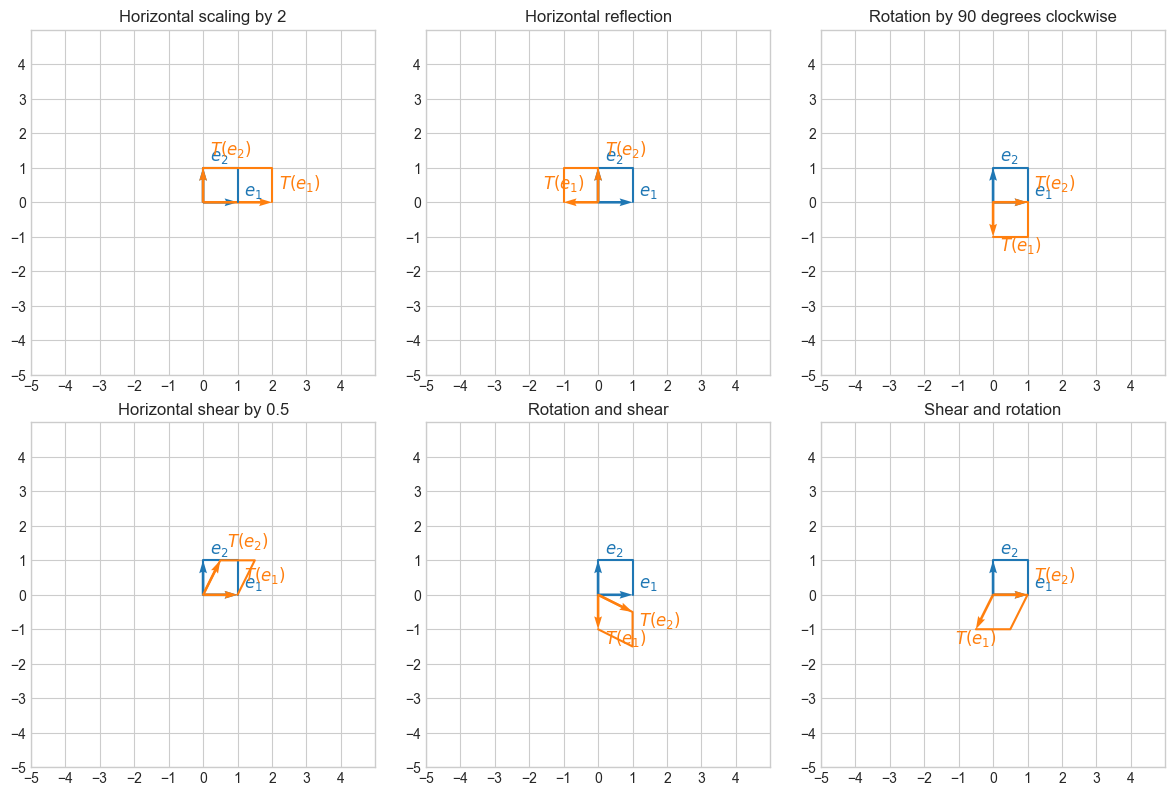

In [34]:
def plot_transformation(
    T: callable, title: str, ax: plt.axes, basis=None, lim=5
) -> None:
    """Plot linear transformations of standard basis vectors in 2D."""
    if basis is None:
        e1 = np.array([[1], [0]])
        e2 = np.array([[0], [1]])
    else:
        e1, e2 = basis
    zero = np.zeros(1, dtype="int")
    c = "tab:blue"
    c_t = "tab:orange"
    ax.set_xticks(np.arange(-lim, lim))
    ax.set_yticks(np.arange(-lim, lim))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    _plot_vectors(e1, e2, c, ax)
    ax.plot(
        [zero, e2[0], e1[0] + e2[0], e1[0]],
        [zero, e2[1], e1[1] + e2[1], e1[1]],
        color=c,
    )
    _make_labels(e1, "$e_1$", c, y_offset=(-0.2, 1.0), ax=ax)
    _make_labels(e2, "$e_2$", c, y_offset=(-0.2, 1.0), ax=ax)
    e1_t = T(e1)
    e2_t = T(e2)
    _plot_vectors(e1_t, e2_t, c_t, ax)
    ax.plot(
        [zero, e2_t[0], e1_t[0] + e2_t[0], e1_t[0]],
        [zero, e2_t[1], e1_t[1] + e2_t[1], e1_t[1]],
        color=c_t,
    )
    _make_labels(e1_t, "$T(e_1)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    _make_labels(e2_t, "$T(e_2)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    ax.set_aspect("equal")
    ax.set_title(title)


def _make_labels(e, text, color, y_offset, ax):
    e_sgn = 0.4 * np.array([[1] if i == 0 else i for i in np.sign(e)])
    return ax.text(
        e[0] - 0.2 + e_sgn[0],
        e[1] + y_offset[0] + y_offset[1] * e_sgn[1],
        text,
        fontsize=12,
        color=color,
    )


def _plot_vectors(e1, e2, color, ax):
    ax.quiver(
        [0, 0],
        [0, 0],
        [e1[0], e2[0]],
        [e1[1], e2[1]],
        color=color,
        angles="xy",
        scale_units="xy",
        scale=1,
    )


def T(A, v):
    """Apply linear transformation."""
    w = A @ v
    return w


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3 * 4, 2 * 4))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()
plot_transformation(partial(T, hscaling), title="Horizontal scaling by 2", ax=ax1)
plot_transformation(partial(T, reflection_yaxis), title="Horizontal reflection", ax=ax2)
plot_transformation(
    partial(T, rotation_90_clockwise), title="Rotation by 90 degrees clockwise", ax=ax3
)
plot_transformation(partial(T, shear_x), title="Horizontal shear by 0.5", ax=ax4)
plot_transformation(
    partial(T, rotation_90_clockwise @ shear_x), title="Rotation and shear", ax=ax5
)
plot_transformation(
    partial(T, shear_x @ rotation_90_clockwise), title="Shear and rotation", ax=ax6
)
plt.tight_layout()
plt.show()

### Linear transformations and rank

Since linear transformations are matrices, they can be singular and non-singular and also have a rank.

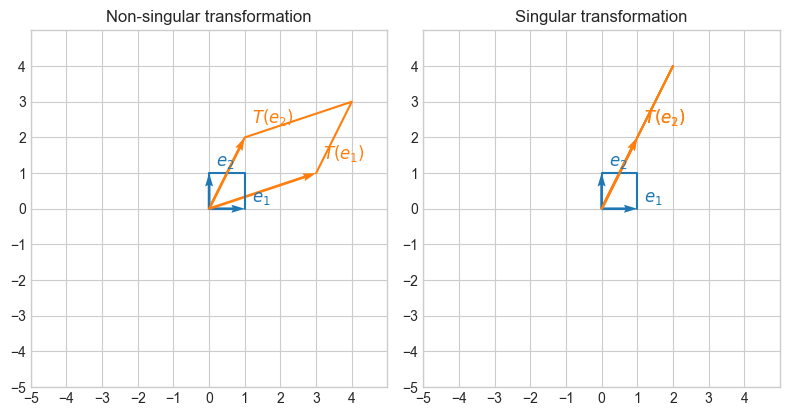

In [35]:
non_sing_tr = np.array([[3, 1], [1, 2]])
sing_tr = np.array([[1, 1], [2, 2]])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2 * 4, 1 * 4))
plot_transformation(
    partial(T, non_sing_tr), title="Non-singular transformation", ax=ax1
)
plot_transformation(partial(T, sing_tr), title="Singular transformation", ax=ax2)
plt.tight_layout()
plt.show()

We can also verify that the first linear transformations has rank 2, while the second one has rank 1.

So the first linear trasformations doesn't reduce the amount of information of the original matrix, while the second one does as it has reduced the rank from 2 to 1, that is transforms a matrix with 2 lineraly independent rows to one with only 1 linearly indepenent row.

> :key: The singularity of a linear transformation determines whether there is dimensionality reduction

> :key: The rank of a linear transformation quantifies the dimensionality reduction

In [36]:
m, p = sympy.Matrix(non_sing_tr).rref()
print("Number of pivots (rank):", len(p))
m

Number of pivots (rank): 2


Matrix([
[1, 0],
[0, 1]])

In [37]:
m, p = sympy.Matrix(sing_tr).rref()
print("Number of pivots (rank):", len(p))
m

Number of pivots (rank): 1


Matrix([
[1, 1],
[0, 0]])

### Linear transformations and determinant

A linear transformation also has a determinant.

> :key: The determinant of a linear transformation is the area or volume of the transformed basis vectors

Let's consider thes non-singular transformations

$\begin{bmatrix}3&&1\\1&&2\end{bmatrix}$

whose determinant is 5.

If we apply it to the basis vectors (whose area is 1) we get a parallelogram with area 5.

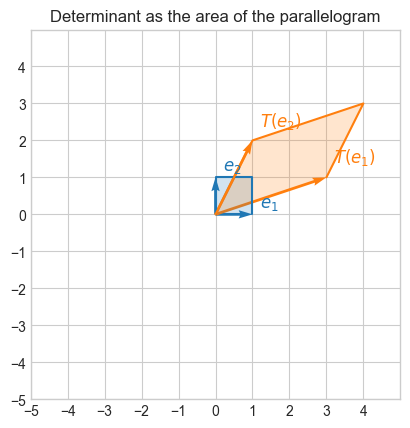

In [38]:
fig, ax = plt.subplots()
plot_transformation(partial(T, non_sing_tr), title="Non-singular transformation", ax=ax)
t_e1 = partial(T, non_sing_tr)(e1)
t_e2 = partial(T, non_sing_tr)(e2)
b_area = plt.Rectangle(
    [0, 0],
    1,
    1,
    fill=True,
    facecolor="tab:blue",
    alpha=0.2,
)
t_area = plt.Polygon(
    [[0, 0], t_e1, t_e1 + t_e2, t_e2],
    closed=True,
    fill=True,
    facecolor="tab:orange",
    alpha=0.2,
)
plt.gca().add_patch(b_area)
plt.gca().add_patch(t_area)
plt.title("Determinant as the area of the parallelogram")
plt.show()

To verify it, we can use the formula for the area of a triangle $A_t = \cfrac{bh}{2}$. For a parallelogram it's just $A_p = bh$.

To calculate $A_p = bh$ we only need $\vec{h}$, because $b = \|T(\vec{e_1})\|$.

To find $\vec{h}$ we can project $T(\vec{e_2})$ onto $T(\vec{e_1})$ and subtract the projection from $T(\vec{e_2})$.

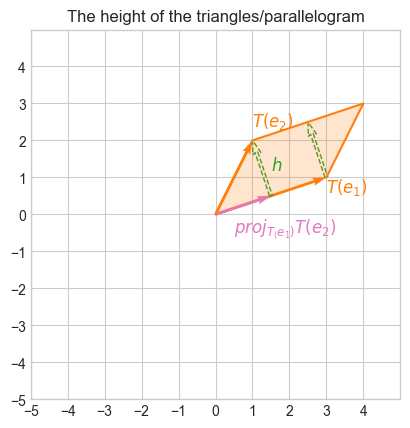

In [39]:
t_e1 = partial(T, non_sing_tr)(e1)
t_e2 = partial(T, non_sing_tr)(e2)
proj_t_e2 = (np.dot(t_e1, t_e2) / np.linalg.norm(t_e1)) * (t_e1 / np.linalg.norm(t_e1))
h = t_e2 - proj_t_e2

plt.quiver(
    [0, 0, 0, proj_t_e2[0], t_e1[0]],
    [0, 0, 0, proj_t_e2[1], t_e1[1]],
    [t_e1[0], t_e2[0], proj_t_e2[0], h[0], h[0]],
    [t_e1[1], t_e2[1], proj_t_e2[1], h[1], h[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    fc=["tab:orange", "tab:orange", "tab:pink", "none", "none"],
    ec=["none", "none", "none", "tab:green", "tab:green"],
    ls=["solid", "solid", "solid", "dashed", "dashed"],
    linewidth=1,
)
t_area = plt.Polygon(
    [[0, 0], t_e1, t_e1 + t_e2, t_e2],
    closed=True,
    fill=True,
    facecolor="tab:orange",
    alpha=0.2,
)
plt.gca().add_patch(t_area)
plt.plot(
    [0, t_e2[0], t_e1[0] + t_e2[0], t_e1[0]],
    [0, t_e2[1], t_e2[1] + t_e1[1], t_e1[1]],
    color="tab:orange",
)
plt.annotate("$T(e_1)$", [t_e1[0], t_e1[1] - 0.4], color="tab:orange", fontsize=12)
plt.annotate("$T(e_2)$", [t_e2[0], t_e2[1] + 0.4], color="tab:orange", fontsize=12)
plt.annotate(
    "$proj_{T_(e_1)}T(e_2)$",
    [proj_t_e2[0] - 1.0, proj_t_e2[1] - 1.0],
    color="tab:pink",
    fontsize=12,
)
plt.annotate(
    "$h$",
    [t_e2[0] + 0.5, t_e2[1] - 0.8],
    color="tab:green",
    fontsize=12,
)
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.title("The height of the triangles/parallelogram")
plt.show()

Now that we have $\vec{h}$, let's calculate $A_p$ and verify it's the same as the determinant of the linear transformation.

In [40]:
assert np.isclose(np.linalg.norm(t_e1) * np.linalg.norm(h), np.linalg.det(non_sing_tr))

## Eigenvalues and Eigenvectors (week 4)

### Basis

> :key: A **basis** of a space is a set of linearly independent vectors that spans the space.

In a 1-D space, we can only have one element in the basis; in a 2-D space, we can only have two elements in the basis, and so on.

> :key: The **span** of a basis is the space consisting of *all* linear combinations of the basis.

Metaphorically, the span of a basis is any point in a space that can be reached by walking only in the directions defined by the basis.

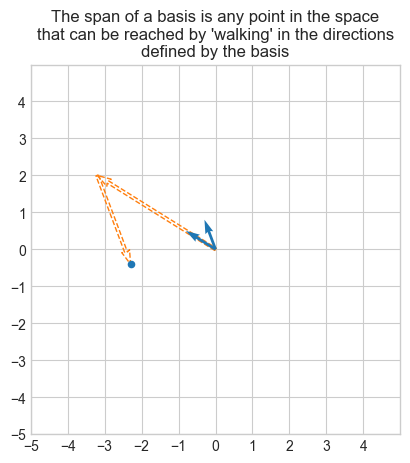

In [41]:
plt.quiver(
    [0, 4 * -0.8, 0, 0],
    [0, 4 * 0.5, 0, 0],
    [
        4 * -0.8,
        -3 * -0.3,
        -0.3,
        -0.8,
    ],
    [4 * 0.5, -3 * 0.8, 0.8, 0.5],
    angles="xy",
    fc=["none", "none", "tab:blue", "tab:blue"],
    ec=["tab:orange", "tab:orange", "none", "none"],
    ls=["dashed", "dashed", "solid", "solid"],
    linewidth=1,
    scale_units="xy",
    scale=1,
)
end_point = np.array([4 * -0.8, 4 * 0.5]) - np.array([3 * -0.3, 3 * 0.8])
plt.scatter(end_point[0], end_point[1], s=20, c="tab:blue")
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.title(
    "The span of a basis is any point in the space\nthat can be reached by 'walking' in the directions\ndefined by the basis"
)
plt.show()

### Eigenvalues

Let's consider the following linear transformations:

$A_1 = \begin{bmatrix}2&&1\\0&&3\end{bmatrix}$

$A_2 = \begin{bmatrix}3&&0\\0&&3\end{bmatrix}$

$A_3 = \begin{bmatrix}2&&0\\0&&2\end{bmatrix}$

We can demonstrate that although $A_1$ and $A_2$ are different transformations, they are indeed the same for infinitely many points. 

And the same can be demonstrated for $A_1$ and $A_3$.

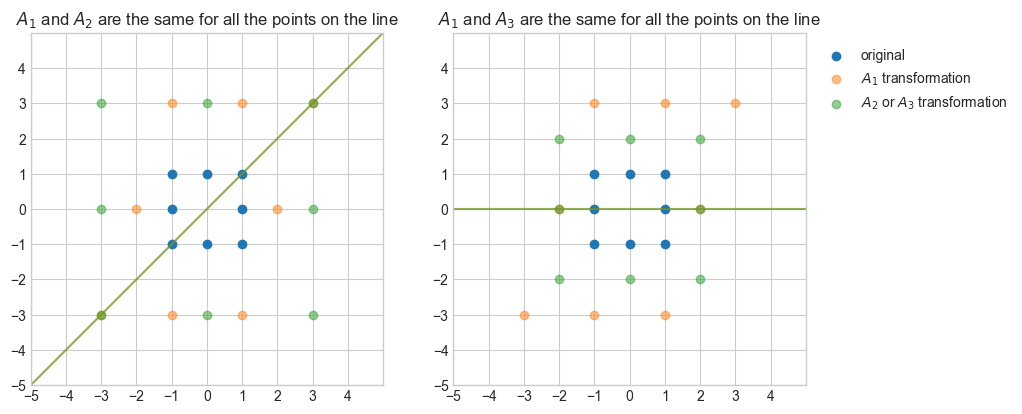

In [42]:
A1 = np.array([[2, 1], [0, 3]])
A2 = np.array([[3, 0], [0, 3]])
A3 = np.array([[2, 0], [0, 2]])
e_set = set(product([-1, 0, 1], [-1, 0, 1])) - set([(0, 0)])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for e in e_set:
    ax1.scatter(e[0], e[1], c="tab:blue")
    ax2.scatter(e[0], e[1], c="tab:blue")
    t_e1 = A1 @ e
    ax1.scatter(t_e1[0], t_e1[1], c="tab:orange", alpha=0.5)
    ax2.scatter(t_e1[0], t_e1[1], c="tab:orange", alpha=0.5)
    t_e2 = A2 @ e
    ax1.scatter(t_e2[0], t_e2[1], c="tab:green", alpha=0.5)
    t_e3 = A3 @ e
    ax2.scatter(t_e3[0], t_e3[1], c="tab:green", alpha=0.5)
ax1.plot([-5, 5], [-5, 5], color="tab:orange", alpha=0.5)
ax1.plot([-5, 5], [-5, 5], color="tab:green", alpha=0.5)
ax2.plot([-5, 5], [0, 0], color="tab:orange", alpha=0.5)
ax2.plot([-5, 5], [0, 0], color="tab:green", alpha=0.5)
ax1.set_xticks(np.arange(-5, 5))
ax1.set_yticks(np.arange(-5, 5))
ax2.set_xticks(np.arange(-5, 5))
ax2.set_yticks(np.arange(-5, 5))
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax1.set_aspect("equal")
ax2.set_aspect("equal")
ax1.set_title("$A_1$ and $A_2$ are the same for all the points on the line")
ax2.set_title("$A_1$ and $A_3$ are the same for all the points on the line")
plt.legend(
    ["original", "$A_1$ transformation", "$A_2$ or $A_3$ transformation"],
    bbox_to_anchor=(1.01, 0.99),
)
plt.show()

With some imagination, we can see that the blue square on the left-hand side gets sheared horizontally with $A_1$ and gets blown out with $A_2$.

We can also see that the points (1, 1) and (-1, -1) go to (3, 3) and (-3, -3) respectively with both $A_1$ and $A_2$.

Similarly, the points (1, 0) and (-1, 0) go to (2, 0) and (-2, 0) respectively with both $A_1$ and $A_3$.

We can verify that the difference between $A_1$ and $A_2$ (and $A_1$ and $A_3$) are singular transformations.

In [43]:
display(
    Math(
        "A_1 - A_2="
        + sympy.latex(sympy.Matrix(A1 - A2))
        + "A_1 - A_3="
        + sympy.latex(sympy.Matrix(A1 - A3))
    )
)
assert np.linalg.det(A1 - A2) == 0
assert np.linalg.det(A1 - A3) == 0

<IPython.core.display.Math object>

The first system of equations is singular and it has infinitely many solution all of which lie on the line $y =  x$.

$\begin{cases}-x+y=0\\0x+0y=0\end{cases} = \begin{cases}y=x\\0=0\end{cases}$

The second system of equations is also singular and it has infinitely many solutions all of which lie on the line $y = 0$.

$\begin{cases}0x+y=0\\0x+y=0\end{cases} = \begin{cases}y=0\\y=0\end{cases}$

It turns out that $A_2$ and $A_3$ have the eigenvalues 2 and 3 of the matrix $A_1$ along their diagonals.

Formally, $\lambda$ is an eigenvalue of $A_1$ if

$\begin{bmatrix}2&&1\\0&&3\end{bmatrix} - \lambda\begin{bmatrix}1&&0\\0&&1\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

or more compactly

$\begin{bmatrix}2-\lambda&&1\\0&&3-\lambda\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

To find the value(s) of $\lambda$ we can use the formula for the determinant, and leverage the fact that it must be zero.

$(2-\lambda) \times (3-\lambda) - 1 \times 0 = 0$

$(2-\lambda) \times (3-\lambda) = 1 \times 0$

Finally we apply the Zero-Factor Property (if the product of two factors is zero, then at least one of the factors must be zero):

$(2-\lambda) = 0 \Rightarrow \lambda = 2$

$(3-\lambda) = 0 \Rightarrow \lambda = 3$

> :key: $\det(A - \lambda I)$ is called the charateristic polynomial

> :key: The values of $\lambda$ for which the charateristic polynomial is zero are called roots of the charateristic polynomial

> :key: The eigenvalues are the roots of the charateristic polynomial

So basically, to find the eigenvalues of $A$ we look at the charateristic polynomial $\det(A - \lambda I)$ and find the roots, that is we solve $\det(A - \lambda I) = 0$ for $\lambda$.

### Eigenvectors

> :key: An eigenvector is any vector whose direction is not changed by a linear transformation and it's only stretched by the eigenvalues.

Formally, $\vec{v}$ is an eigenvector of $A$ if

$Av = \lambda I v$

$(A - \lambda I)v = 0$

Let's continue the example from the previous secion and find the eigenvectors.

We basically need to find $\vec{v}$ in this system.

$\begin{bmatrix}2-\lambda&&1\\0&&3-\lambda\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

For $\lambda=2$ we have

$\begin{bmatrix}0&&1\\0&&1\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R2 = R2 - R1$)

$\begin{bmatrix}0&&1\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_2=0\\0=0\end{cases}$

which has solution $\vec{v} = \langle1, 0\rangle$ or any multiple.

For $\lambda=3$ we have

$\begin{bmatrix}-1&&1\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$,

which is already in row-echelon form, so we only need to solve the following system of equations

$\begin{cases}-v_1+v_2=0\\0=0\end{cases}$

$\begin{cases}v_2=v_1\\0=0\end{cases}$

to find the solution is $\vec{v} = \langle1, 1\rangle$ or any multiple.

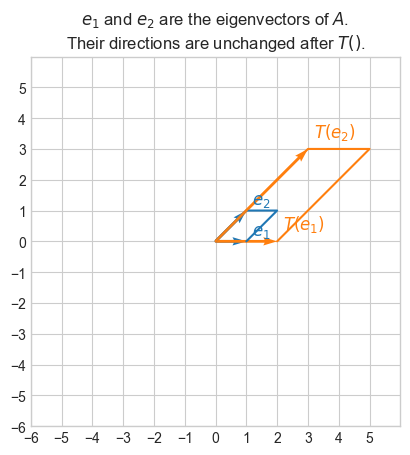

In [44]:
A = np.array([[2, 1], [0, 3]])
evecs = [np.array([[1], [0]]), np.array([[1], [1]])]
lambdas = [2, 3]

for lam, evc in zip(lambdas, evecs):
    assert np.array_equal((A - lam * np.identity(2)) @ evc, np.zeros((2, 1)))
    assert np.array_equal(A @ evc, lam * evc)

fig, ax = plt.subplots()
plot_transformation(
    partial(T, A),
    title="$e_1$ and $e_2$ are the eigenvectors of $A$.\nTheir directions are unchanged after $T()$.",
    ax=ax,
    basis=evecs,
    lim=6,
)

Let's consider anothe matrix.

$A = \begin{bmatrix}9&&4\\4&&3\end{bmatrix}$

To find the eigenvalues we solve

$(9-\lambda)(3-\lambda)-16=0$

$\lambda^2-12\lambda+27-16=0$

$(1-\lambda)(11-\lambda)=0$

So the eigenvalues are $\lambda=1$ and $\lambda=11$.

For $\lambda=1$ the eigenvector is given by

$\begin{bmatrix}8&&4\\4&&2\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R1 = 0.125R1$, $R2 = 0.25R2$, $R2 = R2 - R1$)

$\begin{bmatrix}1&&0.5\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_1+0.5v_2=0\\0=0\end{cases}$

$\begin{cases}v_1=-0.5v_2\\0=0\end{cases}$

which has solution $\vec{v} = \langle-0.5, 1\rangle$ or any multiple.

For $\lambda = 11$ the eigenvector is given by

$\begin{bmatrix}-2&&4\\4&&-8\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix}  = \begin{bmatrix}0\\0\end{bmatrix}$.

The coefficient matrix can be converted to the row-echelon form (after $R1=-0.5R1$, $R2=-0.5R2$ and $R2 = R2 - R1$)

$\begin{bmatrix}1&&-2\\0&&0\end{bmatrix} \begin{bmatrix}v_1\\v_2\end{bmatrix}  = \begin{bmatrix}0\\0\end{bmatrix}$

to obtain the following system of equations

$\begin{cases}v_1-2v_2=0\\0=0\end{cases}$

$\begin{cases}v_1=2v_2\\0=0\end{cases}$

which has solution $\vec{v} = \langle2, 1\rangle$ or any multiple.

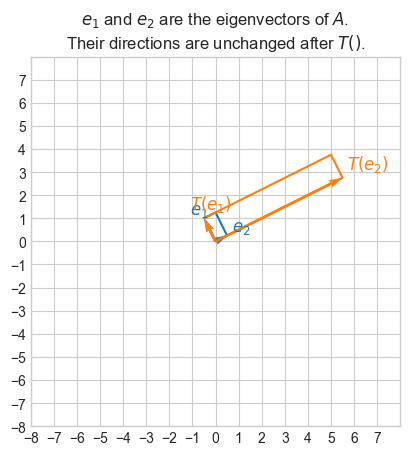

In [45]:
A = np.array([[9, 4], [4, 3]])
lambdas = [1, 11]
evecs = [np.array([[-0.5], [1]]), np.array([[0.5], [0.25]])]

for lam, evc in zip(lambdas, evecs):
    assert np.array_equal((A - lam * np.identity(2)) @ evc, np.zeros((2, 1)))
    assert np.array_equal(A @ evc, lam * evc)

fig, ax = plt.subplots()
plot_transformation(
    partial(T, A),
    title="$e_1$ and $e_2$ are the eigenvectors of $A$.\nTheir directions are unchanged after $T()$.",
    ax=ax,
    basis=evecs,
    lim=8,
)

## Principal Componenent Analysis (extra)

Let's apply all the learnings in this notebook to a simple example of PCA.

We'll see applications of:
- singular and non-singular matrices
- determinants
- dot products
- linear transformations
- eigenvectors and eigenvalues
- vector projections

This was inspired by Luis Serrano's [YT video](https://www.youtube.com/watch?v=g-Hb26agBFg) on PCA.

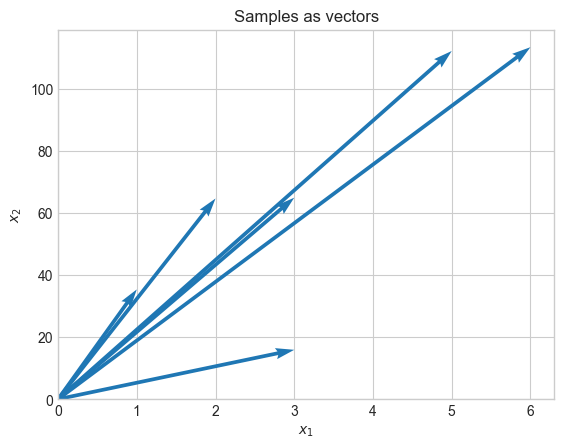

In [46]:
rng = np.random.default_rng(1)

x1 = np.array([[1], [2], [3], [3], [5], [6]])
x2 = (
    10
    + np.array([[1], [2], [3], [3], [5], [6]]) * 15
    + rng.normal(0.0, 30.0, 6).reshape(-1, 1)
)
X = np.hstack([x1, x2])

for r in range(X.shape[0]):
    plt.quiver(
        [0],
        [0],
        [X[r][0]],
        [X[r][1]],
        angles="xy",
        scale=1,
        scale_units="xy",
        color="tab:blue",
    )
plt.xlim(0, X[:, 0].max() * 1.05)
plt.ylim(0, X[:, 1].max() * 1.05)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Samples as vectors")
plt.show()

Let's standardize the data.

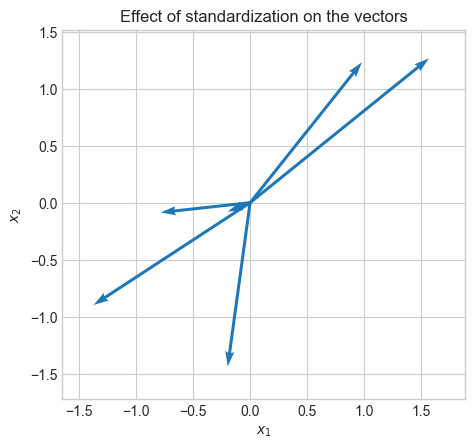

In [47]:
Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
for r in range(Z.shape[0]):
    plt.quiver(
        [0],
        [0],
        [Z[r][0]],
        [Z[r][1]],
        angles="xy",
        scale=1,
        scale_units="xy",
        color="tab:blue",
    )
plt.xlim(Z[:, 0].min() * 1.2, Z[:, 0].max() * 1.2)
plt.ylim(Z[:, 1].min() * 1.2, Z[:, 1].max() * 1.2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.title("Effect of standardization on the vectors")
plt.show()

Let's calculate the covariance matrix, whose eigenvectors represent the directions of the maximum variance (or better maximum correlation since we're using standardized data).

In [48]:
cov = np.cov(Z[:, 0], Z[:, 1], bias=True)
cov_evecs = np.linalg.eig(cov)[1]
cov_v1 = cov_evecs[:, 0]
cov_v2 = cov_evecs[:, 1]
print(f"Determinant of transformation: {np.linalg.det(cov):.2f}")
print(f"Dot product of eigenvectors: {np.dot(cov_v1, cov_v2):.2f}")

Determinant of transformation: 0.36
Dot product of eigenvectors: 0.00


We can see that the covariance matrix represent a non-singular linear transformation.

We can also see that the eigenvectors are orthogonal because their dot product is 0.

> :key: The eigenvectors of a symmetric matrix are orthogonal

Another property of symmetric matrices is that their transformation always entails some sort of stretching, which means that the eigenvalues are always real numbers (not complex numbers like in the case of rotations).

Let's visualize the effect of the linear transformation induced by the covariance matrix.

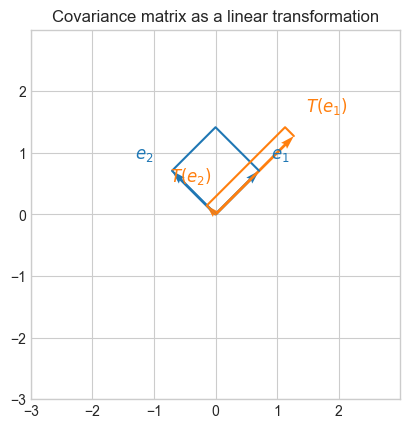

In [49]:
fig, ax = plt.subplots()
plot_transformation(
    partial(T, cov),
    title="Covariance matrix as a linear transformation",
    basis=(cov_v1.reshape(-1, 1), cov_v2.reshape(-1, 1)),
    ax=ax,
    lim=3,
)

To better see the effect of the transformation, we've used a basis that its parallel to the eigenbasis of the transformation.

$COV_{x_1x_2} = \begin{bmatrix}1&&0.8\\0.8&&1\end{bmatrix}$

$\vec{v_1} = \begin{bmatrix}0.7\\0.7\end{bmatrix}$

$\vec{v_2} = \begin{bmatrix}-0.7\\0.7\end{bmatrix}$

$COV_{x_1x_2} \cdot \vec{v_1} = \begin{bmatrix}1 \times 0.7 + 0.8 \times 0.7\\0.8 \times 0.7 + 1 \times 0.7\end{bmatrix} = \begin{bmatrix}1.3\\1.3\end{bmatrix}$

$COV_{x_1x_2} \cdot \vec{v_2} = \begin{bmatrix}1 \times -0.7 + 0.8 \times 0.7\\0.8 \times -0.7 + 1 \times 0.7\end{bmatrix} = \begin{bmatrix}-0.14\\0.14\end{bmatrix}$


Let's overlay the eigenvectors on the data.

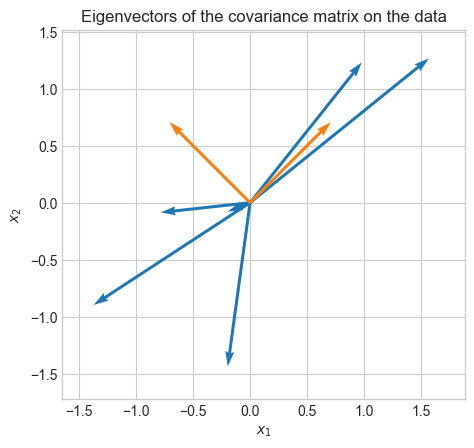

In [50]:
for r in range(Z.shape[0]):
    plt.quiver(
        [0],
        [0],
        [Z[r][0]],
        [Z[r][1]],
        angles="xy",
        scale=1,
        scale_units="xy",
        color="tab:blue",
    )
plt.quiver(
    [0, 0],
    [0, 0],
    [cov_v1[0], cov_v2[0]],
    [cov_v1[1], cov_v2[1]],
    angles="xy",
    scale=1,
    scale_units="xy",
    color="tab:orange",
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(Z[:, 0].min() * 1.2, Z[:, 0].max() * 1.2)
plt.ylim(Z[:, 1].min() * 1.2, Z[:, 1].max() * 1.2)
plt.gca().set_aspect("equal")
plt.title("Eigenvectors of the covariance matrix on the data")
plt.show()

Let's see the principal components (eigenvectors times eigenvalues). Of course, the first principal component is the one with the highest magnitude (eigenvalue).

Given the nature of this data (positively correlated) we expect the first principal component to be the one corresponding to the eigenvector with signs [+, +] or [-, -].

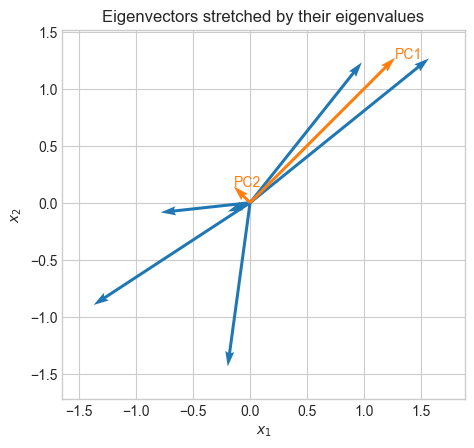

In [51]:
eigvls, eigvcs = np.linalg.eig(cov)
rank = np.argsort(-eigvls)
eigvls = eigvls[rank]
eigvcs = eigvcs[:, rank]
pc = eigvcs * eigvls

for r in range(Z.shape[0]):
    plt.quiver(
        [0],
        [0],
        [Z[r][0]],
        [Z[r][1]],
        angles="xy",
        scale=1,
        scale_units="xy",
        color="tab:blue",
    )
plt.quiver(
    [0, 0],
    [0, 0],
    [pc[:, 0][0], pc[:, 1][0]],
    [pc[:, 0][1], pc[:, 1][1]],
    angles="xy",
    scale=1,
    scale_units="xy",
    color="tab:orange",
)
plt.annotate("PC1", pc[:, 0], color="tab:orange")
plt.annotate("PC2", pc[:, 1], color="tab:orange")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(Z[:, 0].min() * 1.2, Z[:, 0].max() * 1.2)
plt.ylim(Z[:, 1].min() * 1.2, Z[:, 1].max() * 1.2)
plt.gca().set_aspect("equal")
plt.title("Eigenvectors stretched by their eigenvalues")
plt.show()

Let's project all the vectors onto the first principal component.

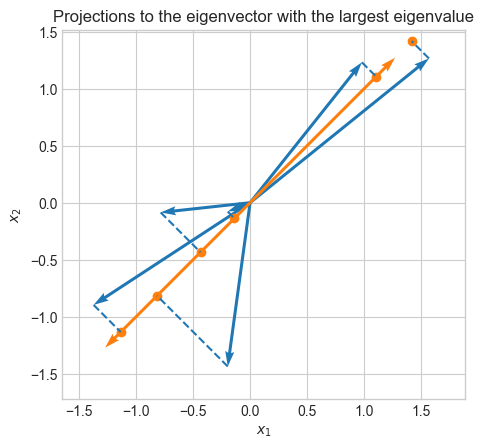

In [52]:
n_components = 1
proj_norm = np.dot(Z, eigvcs[:, :n_components])  # (6, 2) @ (2, 1) -> (6, 1)
proj = np.dot(proj_norm, eigvcs[:, :n_components].T)  # (6, 1) @ (1, 2) -> (6, 2)
plt.plot([Z[:, 0], proj[:, 0]], [Z[:, 1], proj[:, 1]], "--", color="tab:blue")
for r in range(Z.shape[0]):
    plt.quiver(
        [0],
        [0],
        [Z[r][0]],
        [Z[r][1]],
        angles="xy",
        scale=1,
        scale_units="xy",
        color="tab:blue",
    )
plt.quiver(
    [0, 0],
    [0, 0],
    [pc[:, 0][0], -pc[:, 0][0]],
    [pc[:, 0][1], -pc[:, 0][0]],
    angles="xy",
    scale=1,
    scale_units="xy",
    color="tab:orange",
)
plt.scatter(proj[:, 0], proj[:, 1], color="tab:orange")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(Z[:, 0].min() * 1.2, Z[:, 0].max() * 1.2)
plt.ylim(Z[:, 1].min() * 1.2, Z[:, 1].max() * 1.2)
plt.gca().set_aspect("equal")
plt.title("Projections to the eigenvector with the largest eigenvalue")
plt.show()